# Error analysis

In [124]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
file = open("data/pred.pkl", "rb")
pred = pickle.load(file)
print(len(pred))

75


In [10]:
file = open("data/gold.pkl", "rb")
gold = pickle.load(file)
print(len(gold))

74


In [4]:
file = open("data/gold_split.pkl", "rb")
gold_split = pickle.load(file)
print(len(gold_split))

74


In [5]:
def identified_score(span, pred_spans):
    max_int = 0
    for p in pred_spans:
        start = max(span[0], p[0])
        end = min(span[1], p[1])
        intersection = end - start 
        max_int = intersection if intersection > max_int else max_int
    return max_int/(span[1]-span[0])

### Absolute number of missed, partially identified and identified spans

& \rotatebox[origin=c]{90}{  Loaded_Language }
& \rotatebox[origin=c]{90}{  Name_Calling }
& \rotatebox[origin=c]{90}{  Labeling }
& \rotatebox[origin=c]{90}{  Repetition }
& \rotatebox[origin=c]{90}{  Flag-Waving }
& \rotatebox[origin=c]{90}{  Exaggeration }
& \rotatebox[origin=c]{90}{  Minimisation }
& \rotatebox[origin=c]{90}{  Doubt }
& \rotatebox[origin=c]{90}{  Appeal_to_fear-prejudice }
& \rotatebox[origin=c]{90}{  Slogans }
& \rotatebox[origin=c]{90}{  Whataboutism }
& \rotatebox[origin=c]{90}{  Straw_Men }
& \rotatebox[origin=c]{90}{  Red_Herring }
& \rotatebox[origin=c]{90}{  Black-and-White_Fallacy }
& \rotatebox[origin=c]{90}{  Causal_Oversimplification }
& \rotatebox[origin=c]{90}{  Thought-terminating_Cliches }
& \rotatebox[origin=c]{90}{  Appeal_to_Authority }
& \rotatebox[origin=c]{90}{  Bandwagon }
& \rotatebox[origin=c]{90}{  Reductio_ad_hitlerum }
Total , 0 , 0 , 0 , 0


/opt/homebrew/Caskroom/miniforge/base/envs/allennlp/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


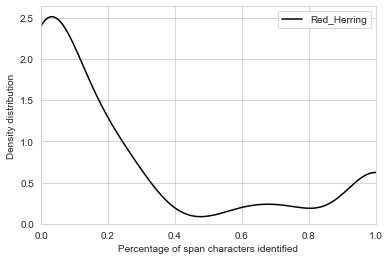

/opt/homebrew/Caskroom/miniforge/base/envs/allennlp/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


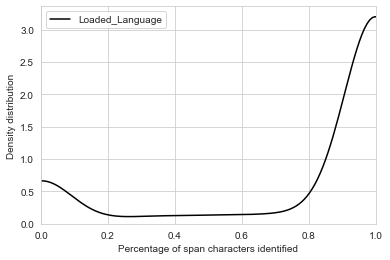

/opt/homebrew/Caskroom/miniforge/base/envs/allennlp/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


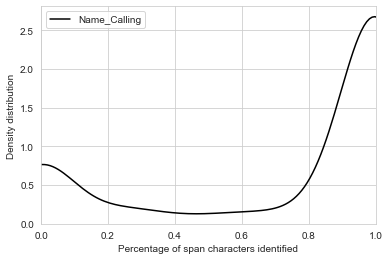

/opt/homebrew/Caskroom/miniforge/base/envs/allennlp/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.25 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


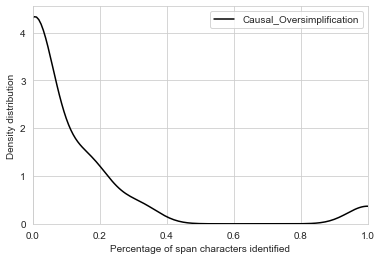

In [25]:
prop_categories = {}
for id, spans in gold_split.items():
    predicted = pred[id]
    for s in spans:
        score = identified_score(s, predicted)
        if s[2] not in prop_categories:
            prop_categories[s[2]] = {"segm":[1, 0, 0, 0], "dist":[]}
        else:
            prop_categories[s[2]]["segm"][0] += 1
        if score >= 0.75:
            prop_categories[s[2]]["segm"][3] += 1
        elif score >= 0.15:
            prop_categories[s[2]]["segm"][2] += 1
        else:
            prop_categories[s[2]]["segm"][1] += 1
        prop_categories[s[2]]["dist"].append(score)

ordered_cat = [[name, val["segm"][1], val["segm"][2], val["segm"][3], val["segm"][0]] for name, val in prop_categories.items()]
ordered_cat.sort(key=lambda y: y[4], reverse=True)

sum = [0,0,0,0]
for i in range(1,2):
    for cat in ordered_cat:
        print("& \\rotatebox[origin=c]{90}{ ", cat[0], "}")

print("Total ,", sum[0], ",",sum[1], ",",sum[2], ",", sum[3])

i = 0
for name, cat in prop_categories.items():
    if name == "Loaded_Language" or name == "Name_Calling" or name=="Causal_Oversimplification" or name=="Red_Herring":
        sns.set_style('whitegrid')
        sns.set_palette("deep")
        # g=sns.distplot(np.array(cat["dist"]), hist=True, kde=False, 
        #      color = 'darkblue', 
        #      hist_kws={'edgecolor':'black'},
        #      kde_kws={'linewidth': 4})
        g = sns.kdeplot(np.array(cat["dist"]), bw=0.25, label=name,  legend=True, color="k")
        #sns.histplot(np.array(cat["dist"]));
        g.set(xlim=(0, 1))
        g.set(ylabel='Density distribution', xlabel='Percentage of span characters identified')  
        plt.savefig(name+'.pdf')
        plt.legend()
        plt.show()

### Percentages of missed, partially identified and identified spans

In [109]:
for cat in ordered_cat:
    print(cat[0], ",", cat[1]/cat[4], ",", cat[2]/cat[4], ",", cat[3]/cat[4])

Loaded_Language , 0.15692307692307692 , 0.07076923076923076 , 0.7723076923076924
Name_Calling , 0.1912568306010929 , 0.09836065573770492 , 0.7103825136612022
Labeling , 0.1912568306010929 , 0.09836065573770492 , 0.7103825136612022
Repetition , 0.38620689655172413 , 0.020689655172413793 , 0.593103448275862
Flag-Waving , 0.20689655172413793 , 0.21839080459770116 , 0.5747126436781609
Exaggeration , 0.4117647058823529 , 0.17647058823529413 , 0.4117647058823529
Minimisation , 0.4117647058823529 , 0.17647058823529413 , 0.4117647058823529
Doubt , 0.6363636363636364 , 0.2727272727272727 , 0.09090909090909091
Appeal_to_fear-prejudice , 0.20454545454545456 , 0.38636363636363635 , 0.4090909090909091
Slogans , 0.25 , 0.1 , 0.65
Whataboutism , 0.5862068965517241 , 0.27586206896551724 , 0.13793103448275862
Straw_Men , 0.5862068965517241 , 0.27586206896551724 , 0.13793103448275862
Red_Herring , 0.5862068965517241 , 0.27586206896551724 , 0.13793103448275862
Black-and-White_Fallacy , 0.6363636363636364

### Perc of predicted spans which exactly match on gold span.

Import prediction dict generated with `merge_articles.py`.

In [7]:
file = open("data/pred_original.pkl", "rb")
pred = pickle.load(file)
print(len(pred))

75


Define IoU score function.

In [11]:
def iou(predicted_span, others):
    """
    Compute best IoU between a given span and a set spans
    """
    max_iou = 0
    contained = False
    for gold_span in others:
        start = max(predicted_span[0], gold_span[0])
        end = min(predicted_span[1], gold_span[1])
        intersection = end - start
        union_start = min(predicted_span[0], gold_span[0])
        union_end = max(predicted_span[1], gold_span[1])
        union = union_end - union_start if intersection > 0 else 0
        if intersection > 0:
            max_iou = intersection/union if intersection/union > max_iou else max_iou
            contained = contained or (gold_span[0] > predicted_span[0] and gold_span[1] < predicted_span[1])
    return max_iou, contained

Compute IoU between predicted and gold spans.

In [12]:
total = 0
match = 0
more_50 = 0
more_25 = 0
more_0 = 0
containing = 0
for id, spans in pred.items():
    if id in gold:
        gold_spans = gold[id]
        for s in spans:
            iou_score, contains = iou(s, gold_spans)
            if iou_score == 1:
                match += 1
            if iou_score > 0.5:
                more_50 += 1
            if iou_score > 0.25:
                more_25 += 1
            if iou_score > 0:
                more_0 += 1
            if contains:
                containing += 1
            total +=1
print(f"Perfectly matching spans: {match} ({match/total})")
print(f"Spans that intersect more than a half of a gold span: {more_50} ({more_50/total})")
print(f"Spans that intersect more than a quarter of a gold span: {more_25} ({more_25/total})")
print(f"Spans that intersect more than zero of a gold span: {more_0} ({more_0/total})")
print("Total spans:", total)
print(f"Predicted spans which fully contain a gold span: {containing}")

Perfectly matching spans: 74 (0.04124860646599777)
Spans that intersect more than a half of a gold span: 368 (0.20512820512820512)
Spans that intersect more than a quarter of a gold span: 540 (0.3010033444816054)
Spans that intersect more than zero of a gold span: 713 (0.3974358974358974)
Total spans: 1794
Predicted spans which fully contain a gold span: 159


### IoU score for predictions

In [5]:
file = open("data/pred_original.pkl", "rb")
pred = pickle.load(file)
print(len(pred))

165


In [50]:
ious = {}
for id, spans in gold_split.items():
    predicted = pred[id]
    for s in spans:
        score = iou(s, predicted)
        if s[2] not in ious:
            ious[s[2]] = [score]
        else:
            ious[s[2]].append(score)
    
for key, val in ious.items():
    print(key, np.mean(val))

Repetition 0.2918345773222628
Whataboutism 0.438128094960949
Straw_Men 0.438128094960949
Red_Herring 0.438128094960949
Loaded_Language 0.45083825105573333
Name_Calling 0.512218956463561
Labeling 0.512218956463561
Flag-Waving 0.5106576226503081
Causal_Oversimplification 0.4080024341057374
Doubt 0.35656390677470856
Thought-terminating_Cliches 0.3984295241589718
Exaggeration 0.5183802739405564
Minimisation 0.5183802739405564
Black-and-White_Fallacy 0.281765413918924
Slogans 0.46893856344370466
Appeal_to_fear-prejudice 0.5572696781258776
Bandwagon 0.25088633993743487
Reductio_ad_hitlerum 0.25088633993743487
Appeal_to_Authority 0.560704723732674


## TC confusion matrix

In [131]:
labels = {
    'Not_Propaganda': 0,
    'Loaded': 1,
    'Labeling': 2,
    'Repetition': 3,
    'Exaggeration': 4,
    'Doubt': 5,
    'Prejudice': 6,
    'Flag': 7,
    'Oversimplification': 8,
    'Slogans': 9,
    'Authority': 10,
    'Fallacy': 11,
    'Cliches': 12,
    'Whataboutism': 13,
    'Bandwagon': 14,
}

labelsa= {
    'Not_Propaganda': 0,
    'Loaded_Language': 1,
    'Name_Calling,Labeling': 2,
    'Repetition': 3,
    'Exaggeration,Minimisation': 4,
    'Doubt': 5,
    'Appeal_to_fear-prejudice': 6,
    'Flag-Waving': 7,
    'Causal_Oversimplification': 8,
    'Slogans': 9,
    'Appeal_to_Authority': 10,
    'Black-and-White_Fallacy': 11,
    'Thought-terminating_Cliches': 12,
    'Whataboutism,Straw_Men,Red_Herring': 13,
    'Bandwagon,Reductio_ad_hitlerum': 14,
}

def label_to_int(label):
    return labels[label]

def int_to_label(i):
    for key, value in labels.items():
        if value == i:
            return key
    raise ValueError(f'Key for value {i} doesnt exist.')

In [129]:
file = open("data/gold.pkl", "rb")
gold = pickle.load(file)
print(len(gold))
file = open("data/pred.pkl", "rb")
pred = pickle.load(file)
print(len(pred))

74
74


In [130]:
y_true = []
y_pred = []
for a in sorted(gold):
    true_spans = pred[a]
    pred_spans = gold[a]
    for ts in true_spans:
        for ps in pred_spans:
            if ps[0] == ts[0] and ps[1] == ts[1]:
                y_true.append(label_to_int_alt(ts[2]))
                y_pred.append(label_to_int_alt(ps[2]))
print(len(y_true))
print(len(y_pred))

490
490


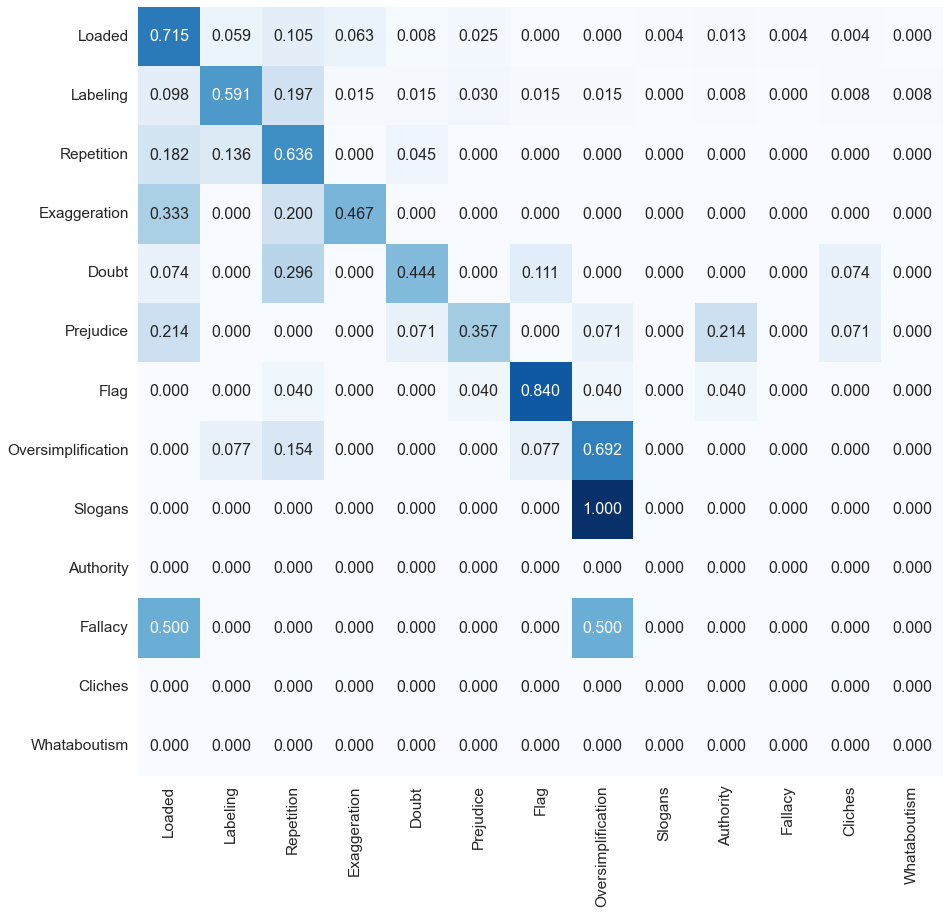

In [133]:
from sklearn.metrics import confusion_matrix
import pandas as pd 

cm=confusion_matrix(y_true=y_true, y_pred=y_pred, normalize="true")

df_cm = pd.DataFrame(cm, index = [int_to_label(i) for i in range(1,14)],
                  columns = [int_to_label(i) for i in range(1,14)])

plt.figure(figsize = (13.5,13))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(df_cm, 
            annot=True, 
            annot_kws={"size": 16}, 
            fmt='.3f', 
            cmap="Blues",
            cbar=False) 
plt.tight_layout()  

plt.savefig('confusion.pdf')
plt.show()